In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

from slices import pore_slices, _plot_boundary
# from msms_surfslices import msms_slices

# Demo: channel 1

In [2]:
# Parameters
z = -2
f = 0
lower = -2.5
upper = -1.5
incr = 0.01
center = (0, 0)
radius = 0.85

(-6.0, 6.0)

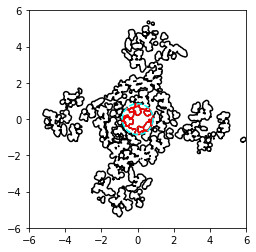

In [ ]:
traj = md.load(os.path.expanduser("~/scratch/research/trajectories/883_md_fixed_dt1000_mda.xtc"), 
               top=os.path.expanduser("~/research/data/topologies/75_init.gro"))
# atom slice to get just the protein
traj = traj.atom_slice(traj.top.select("protein"))[0]

dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=center, radius=radius, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, accessible, cylinder)
axs.set_xlim(-6,6)
axs.set_ylim(-6,6)

In [ ]:
dat.slice_run(lower=lower, upper=upper, incr=incr, center=center, radius=radius)

dat.slice_df.describe()

Analyzing frame 1 out of 1


frame           z        area
count  101.0  101.000000  101.000000
mean     0.0   -2.000000    0.975543
std      0.0    0.293002    0.180637
min      0.0   -2.500000    0.697373
25%      0.0   -2.250000    0.833980
50%      0.0   -2.000000    0.927809
75%      0.0   -1.750000    1.116120
max      0.0   -1.500000    1.342328

/home/wilson/slice_channel/src/slices.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


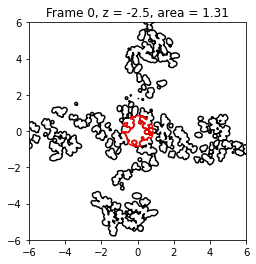

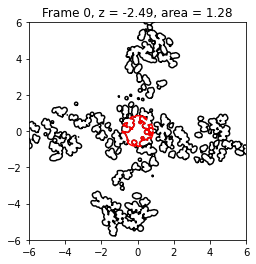

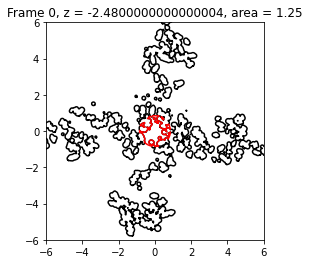

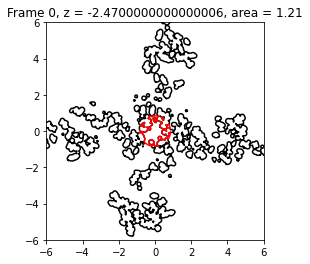

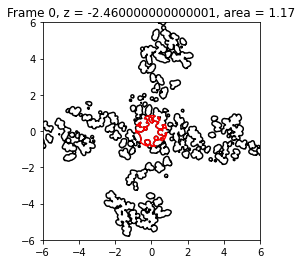

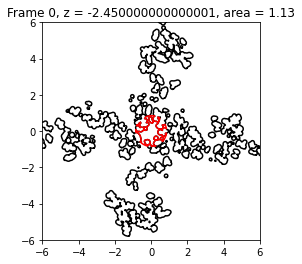

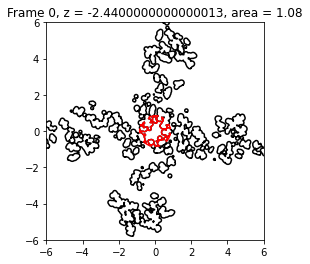

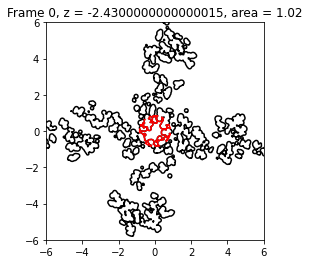

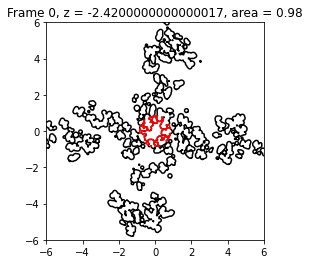

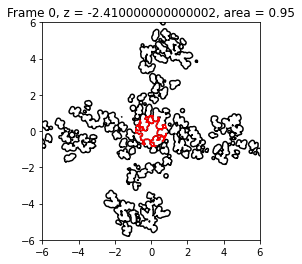

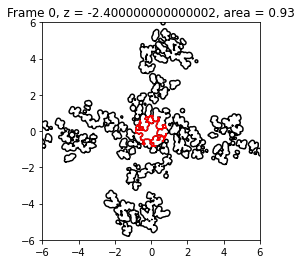

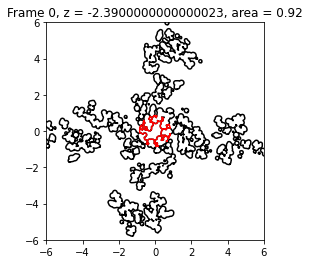

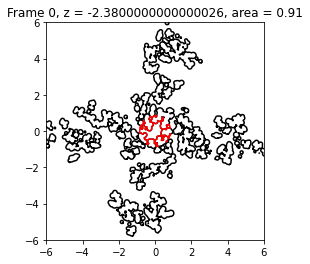

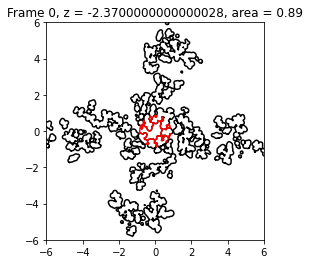

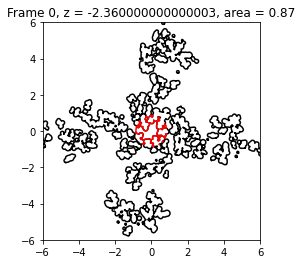

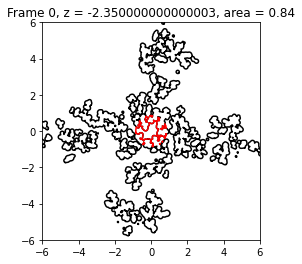

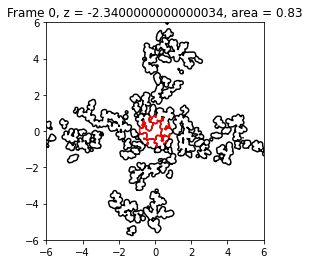

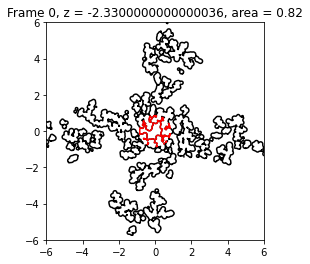

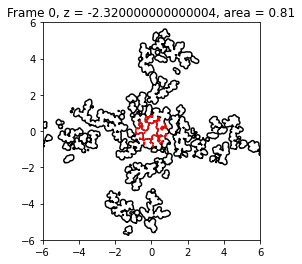

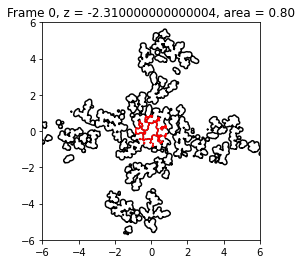

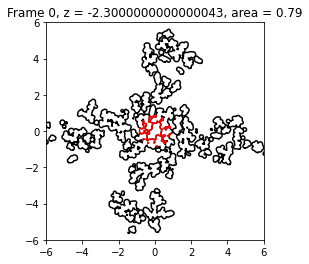

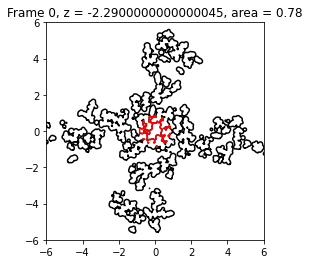

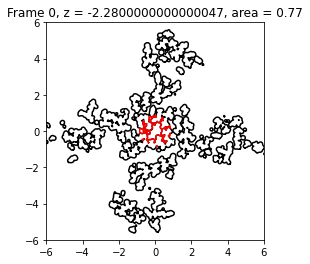

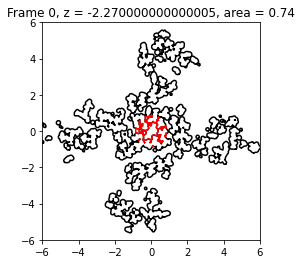

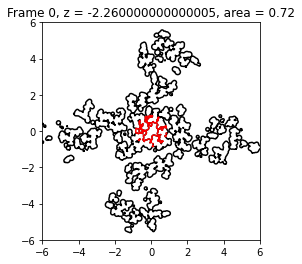

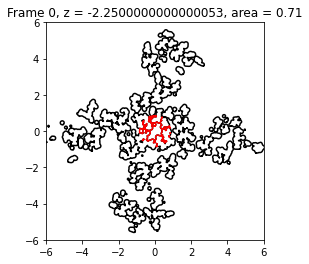

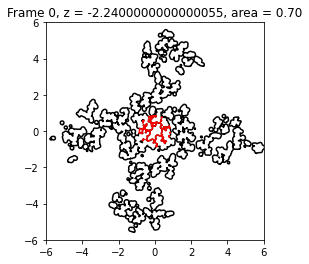

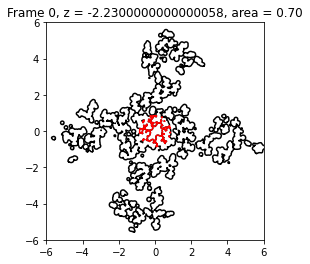

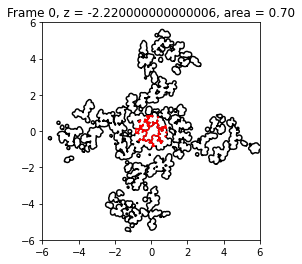

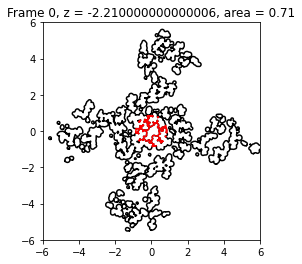

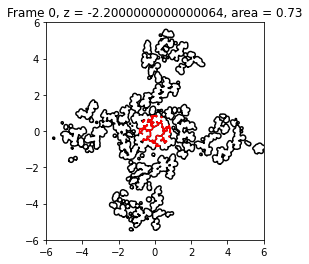

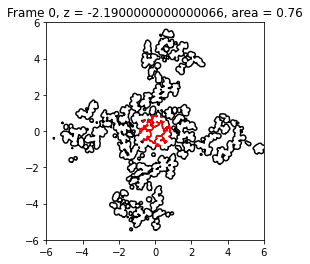

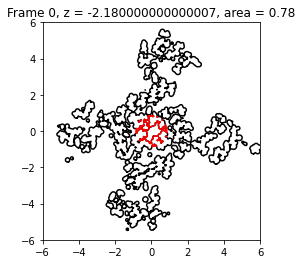

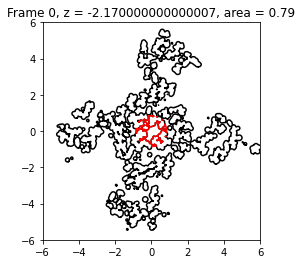

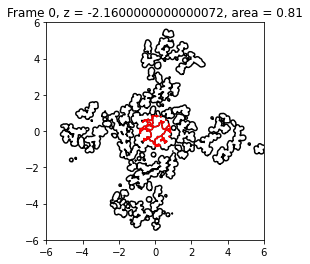

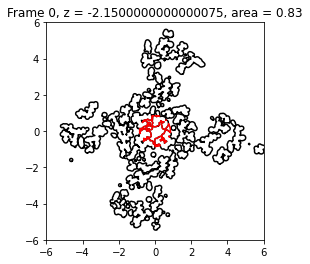

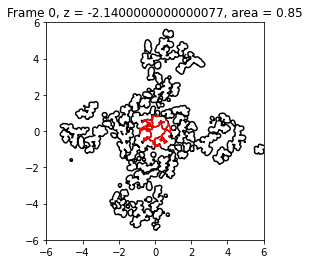

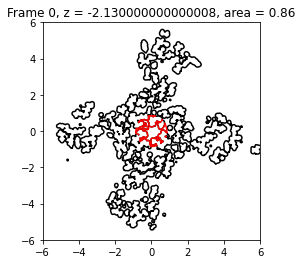

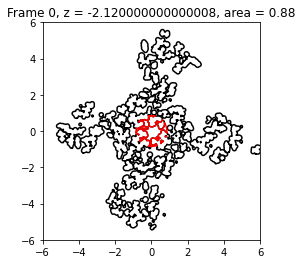

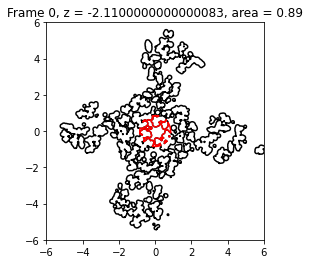

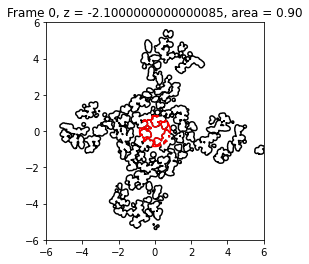

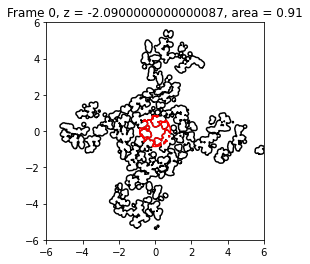

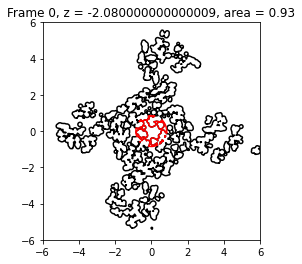

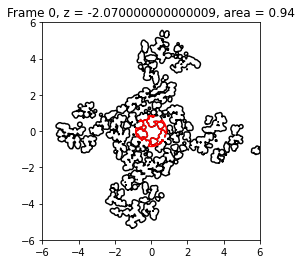

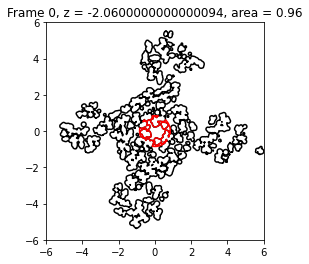

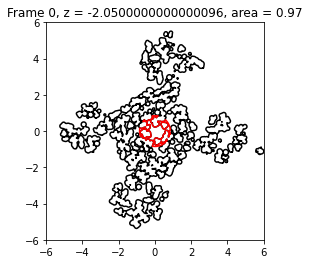

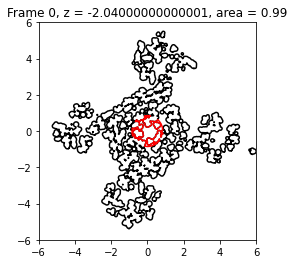

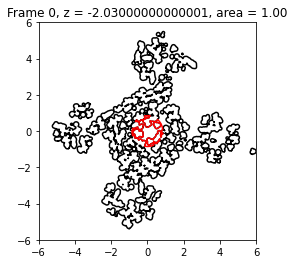

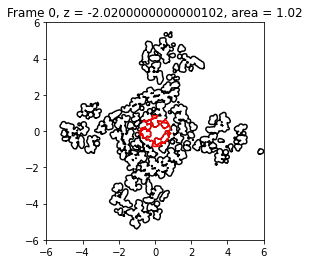

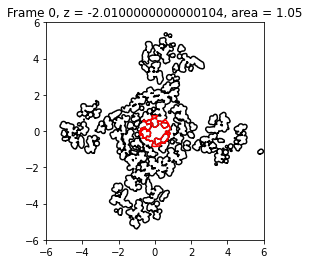

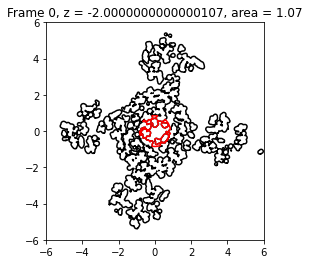

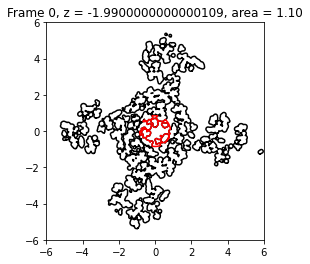

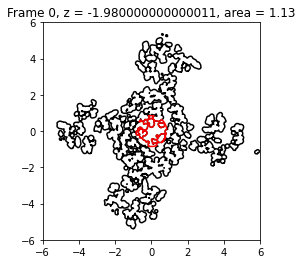

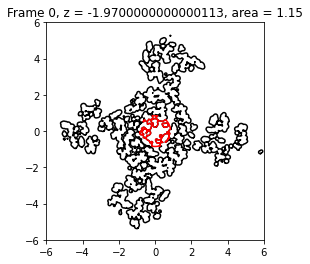

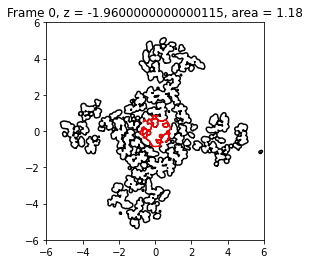

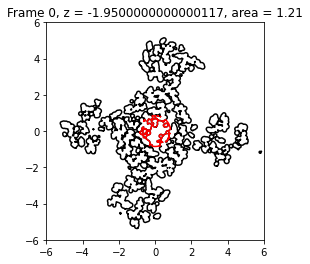

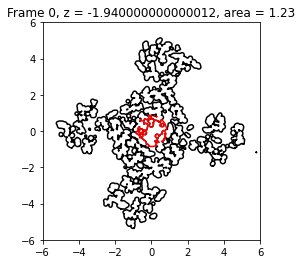

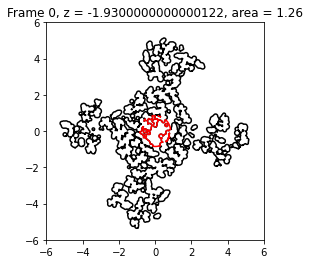

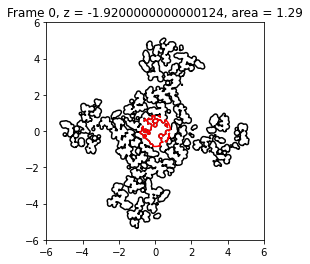

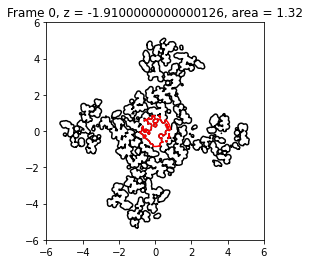

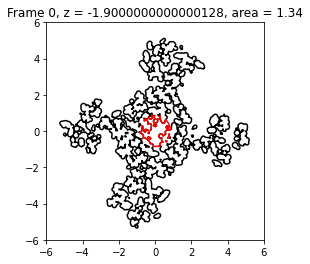

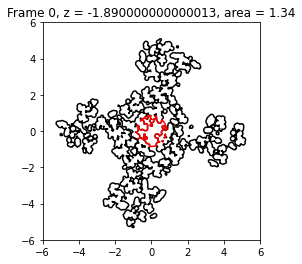

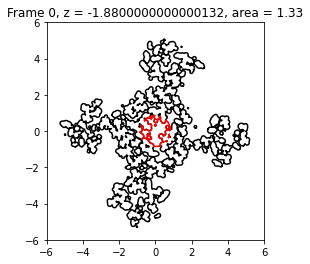

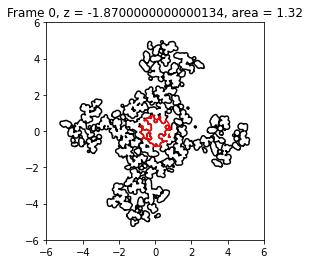

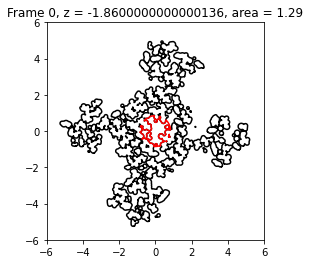

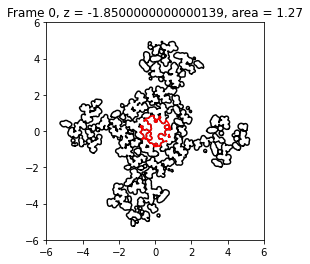

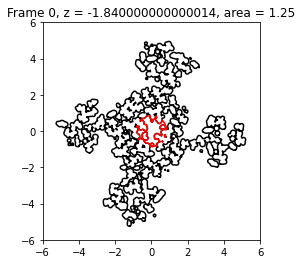

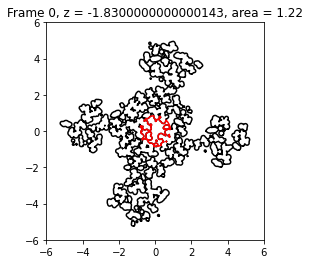

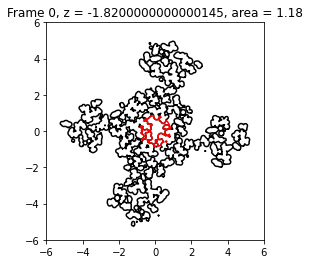

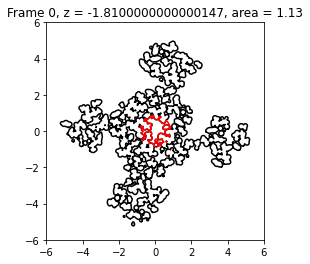

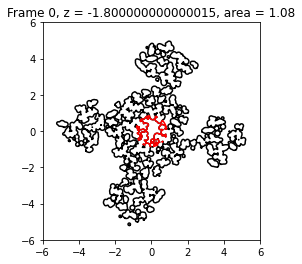

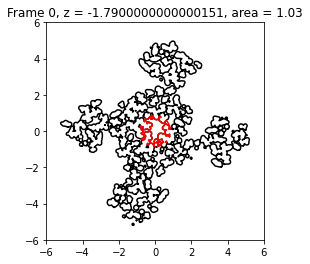

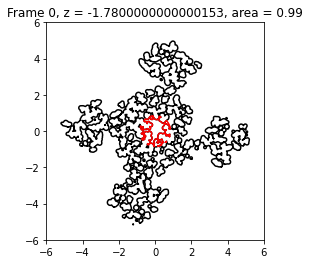

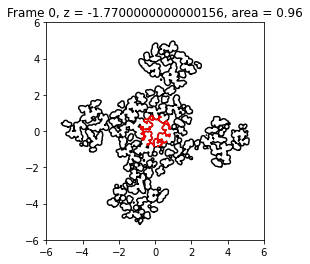

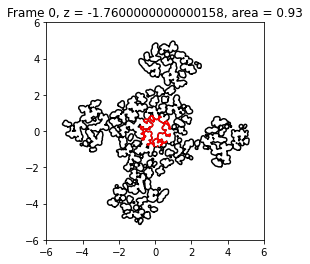

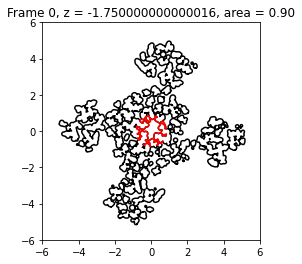

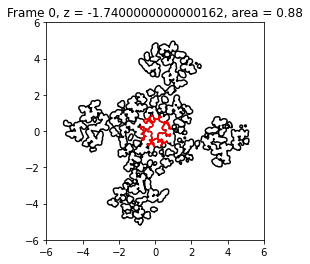

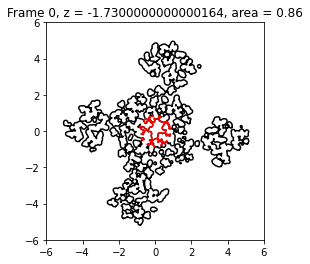

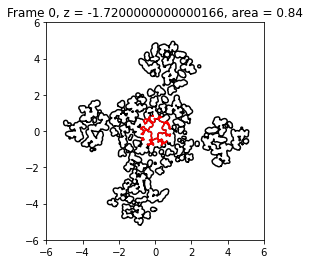

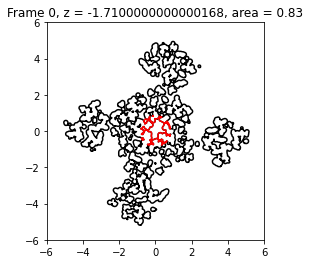

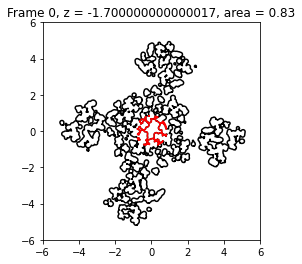

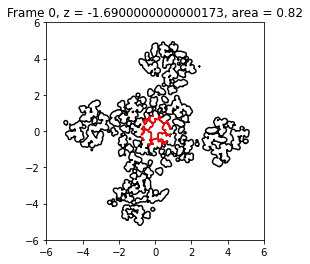

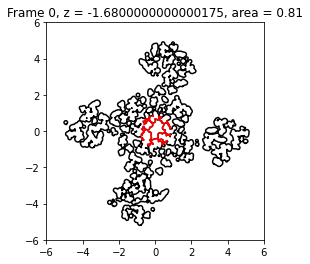

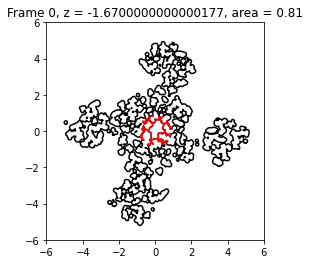

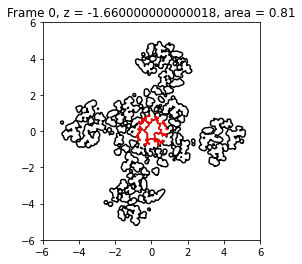

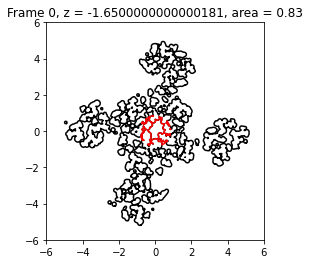

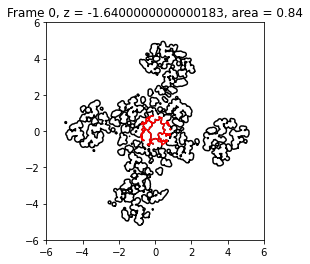

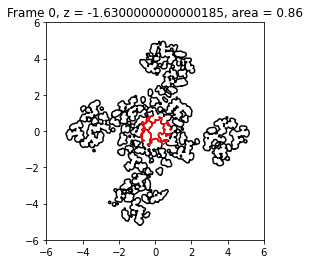

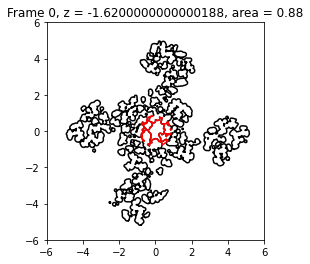

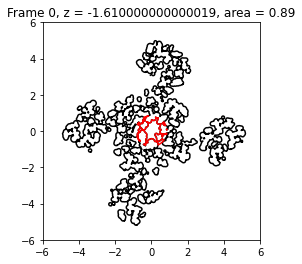

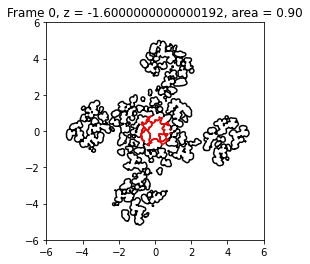

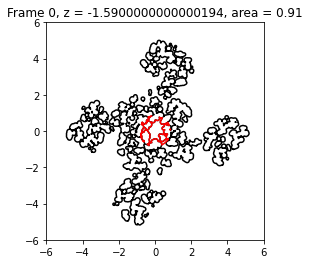

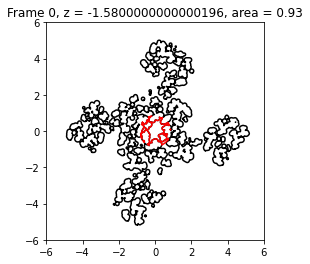

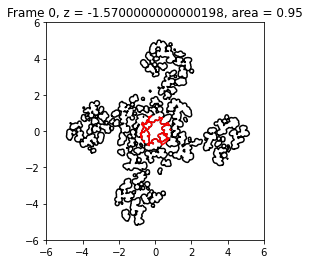

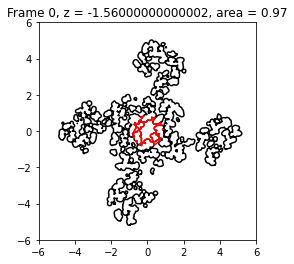

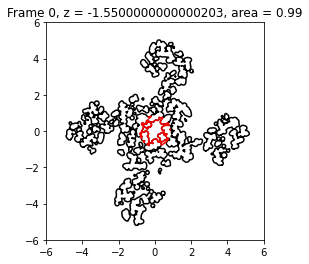

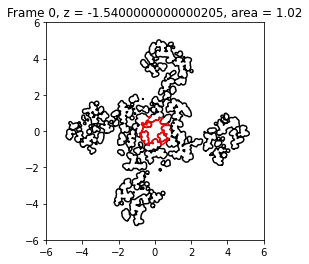

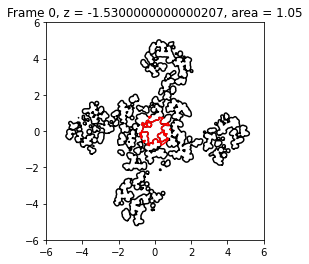

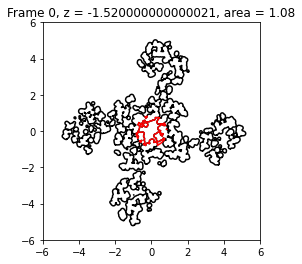

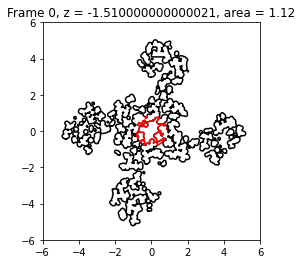

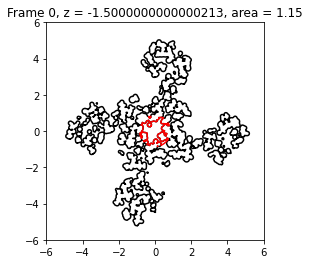

In [6]:
dat.view_slices(frame=0)

(0.0, 3.0)

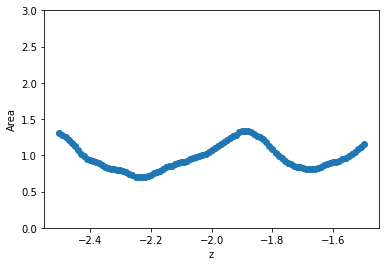

In [9]:
axs = dat.area_vs_z(frame=0)
axs.set_ylim(0,3)

In [10]:
dat.calc_volume(frame=0)

0.972988106696806

## Larger probe radius

(-6.0, 6.0)

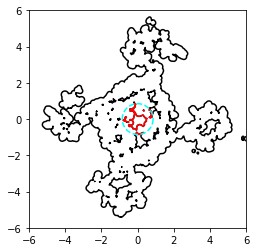

In [ ]:
dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0.05)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=(0,0), radius=0.85, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, cylinder, accessible)
axs.set_xlim(-6,6)
axs.set_ylim(-6,6)

# Channel 2

In [30]:
# Parameters
z = 13.5
f = 0
# lower = 9
# upper = 12.75
# incr = 0.125

(2.0, 8.0)

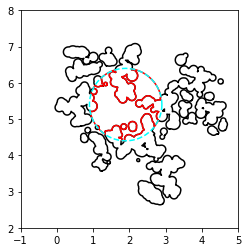

In [ ]:
# when probe_radius=0.14, this should just gives a slice of the protein molecular surface
traj = md.load(os.path.expanduser("~/scratch/research/trajectories/70_md_fixed_dt1000_mda.xtc"), 
               top=os.path.expanduser("~/research/data/topologies/1_init.gro"))
# atom slice to get just the protein
traj = traj.atom_slice(traj.top.select("protein"))

dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=(1.9,5.4), radius=1, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, accessible, cylinder)
axs.set_xlim(-1,5)
axs.set_ylim(2,8)


Visualization can inform the better center and radius of the region to enclose

(2.0, 8.0)

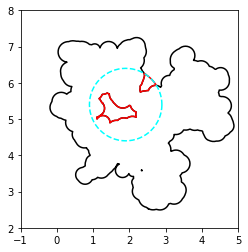

In [ ]:
# when probe_radius=0.14, this just gives a slice of the protein SASA (water)
dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0.14)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=(1.9,5.4), radius=1, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, cylinder, accessible)
axs.set_xlim(-1,5)
axs.set_ylim(2,8)

# Channel 3

In [20]:
# Parameters
z = 0
f = 0
lower = -2
upper = 2
incr = 0.025
center = (0.7, -0.1)
radius = 1

In [ ]:
traj = md.load(os.path.expanduser("~/downloads/6wnr.pdb"))
# atom slice to get just the protein
traj = traj.atom_slice(traj.top.select("protein"))[0]

dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=center, radius=radius, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, accessible, cylinder)
axs.set_xlim(-6,6)
axs.set_ylim(-6,6)

ValueError: PDB Error: All MODELs must contain the same number of ATOMs

Make sure the pdb does not have DUM atoms; they are treated as a separate model by MDTraj. This is relevant as I downloaded the pdb from OPM

(-6.0, 6.0)

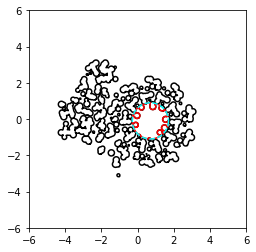

In [ ]:
# Warning: this one has no hydrogens
traj = md.load(os.path.expanduser("~/downloads/6wnr_noDUM.pdb"))
# atom slice to get just the protein
traj = traj.atom_slice(traj.top.select("protein"))[0]

dat = pore_slices(protein_xyz=traj.xyz, protein_top=traj.top, probe_radius=0)
prot, cylinder, accessible, color_info = dat.zslice(zlevel=z, center=center, radius=radius, frame=f, color=False)

fig, axs = plt.subplots()
dat.plot_slice(axs, prot, accessible, cylinder)
axs.set_xlim(-6,6)
axs.set_ylim(-6,6)

In [ ]:
# Parameters
z = 0
f = 0
lower = -2
upper = 2
incr = 0.1
center = (-1.8, -2)
radius = 1


dat.slice_run(lower=lower, upper=upper, incr=incr, center=center, radius=radius)

dat.slice_df.describe()

TypeError: slice_run() got an unexpected keyword argument 'probe_radius'

/home/wilson/slice_channel/src/slices.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


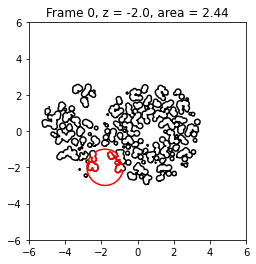

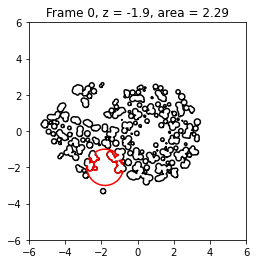

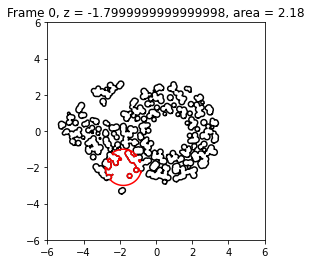

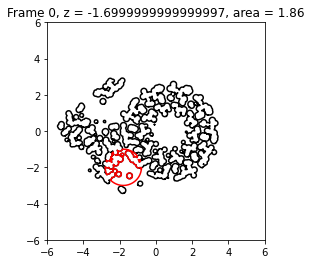

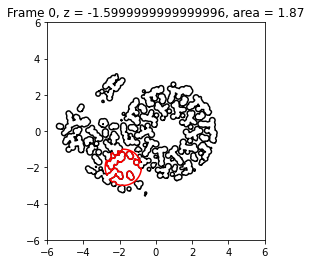

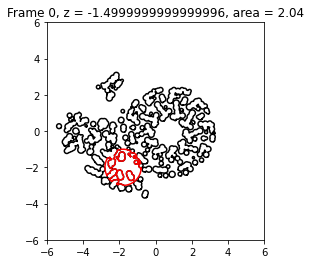

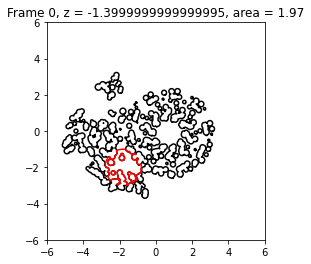

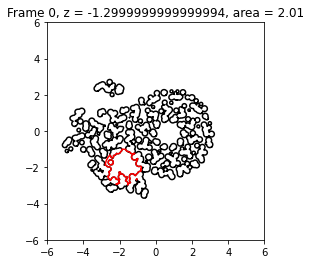

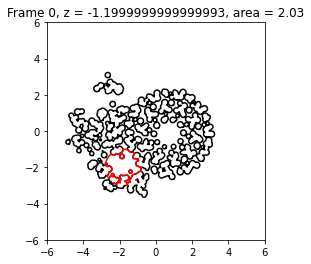

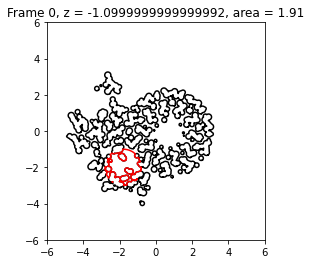

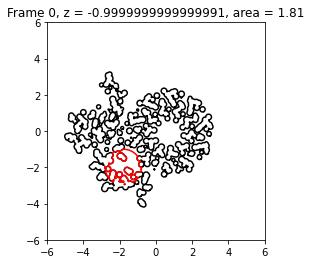

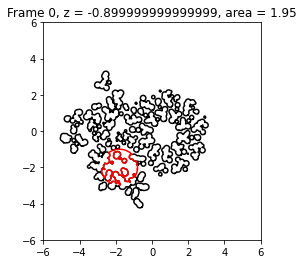

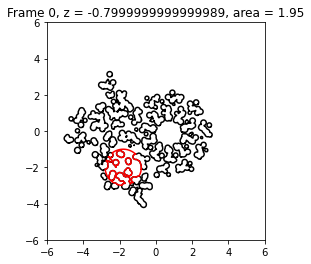

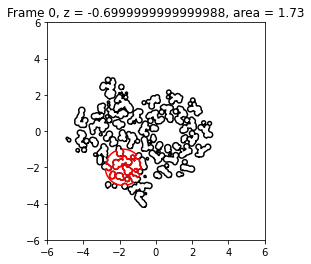

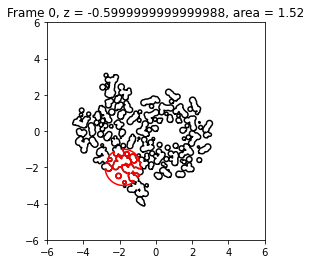

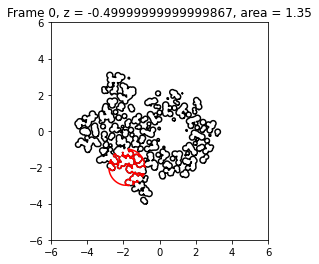

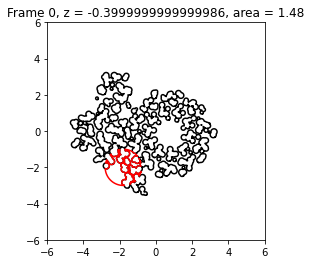

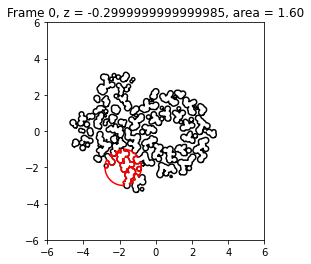

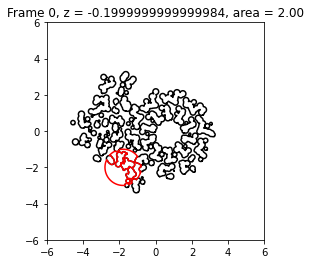

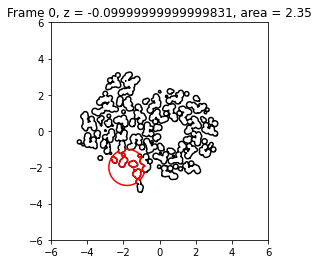

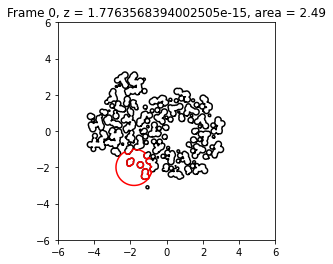

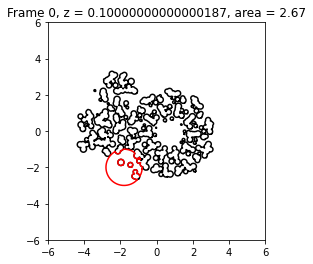

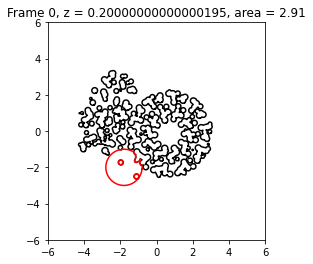

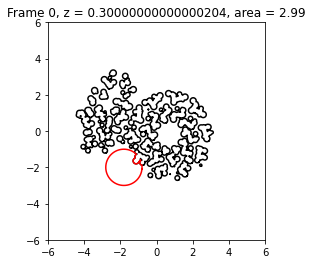

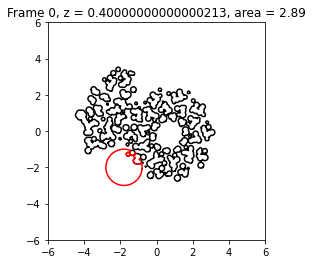

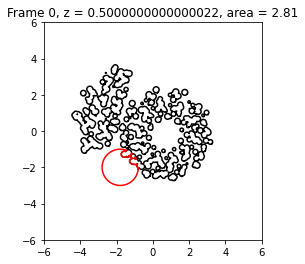

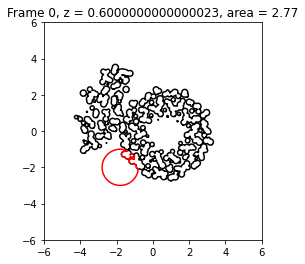

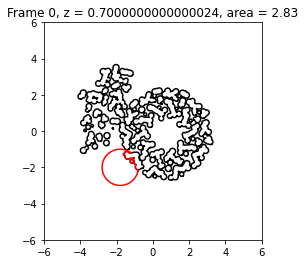

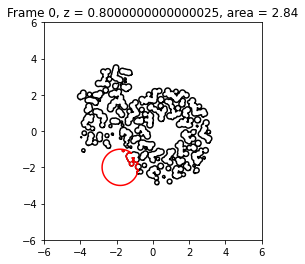

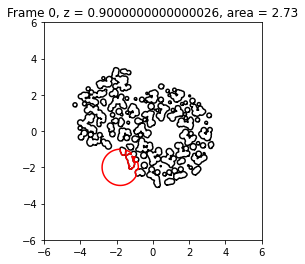

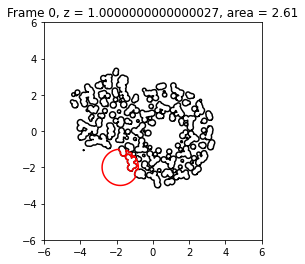

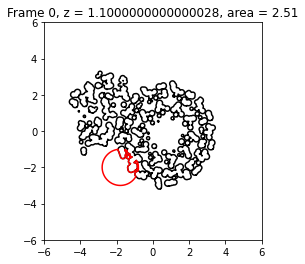

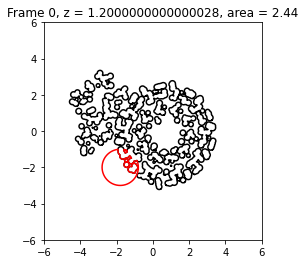

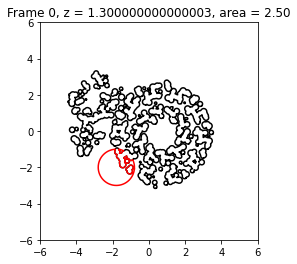

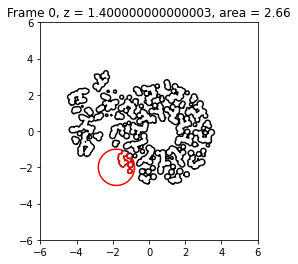

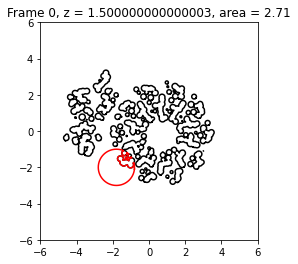

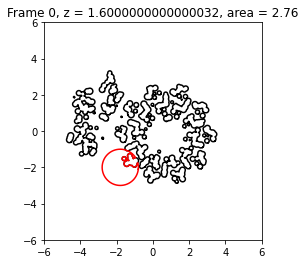

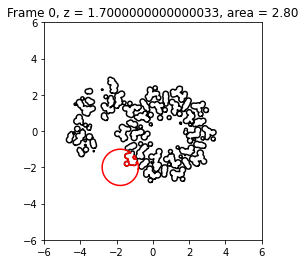

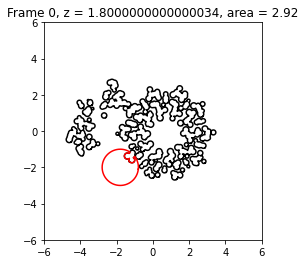

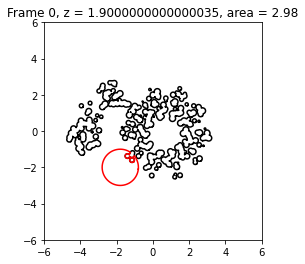

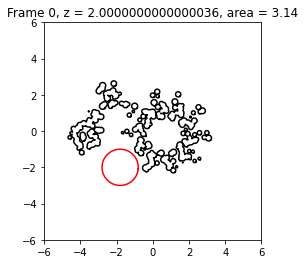

In [33]:
dat.view_slices(frame=0)

(0.0, 8.0)

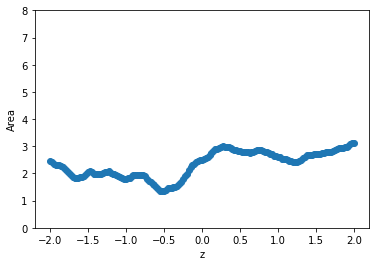

In [30]:
axs = dat.area_vs_z(frame=0)
axs.set_ylim(0,8)

In [31]:
dat.calc_volume(frame=0)

9.35697975236666